In [1]:
from heapq import heappush, heappop, heapify
from collections import Counter
from PIL import Image
from IPython.display import display
import os, pickle

In [2]:
# Fungsi Huffman Coding
def huffman_coding(data_bytes):
    freq = Counter(data_bytes)
    heap = [[weight, [symbol, ""]] for symbol, weight in freq.items()]
    heapify(heap)
    
    while len(heap) > 1:
        lo = heappop(heap)
        hi = heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    
    return dict(sorted(heap[0][1:], key=lambda p: (len(p[-1]), p)))

In [3]:
def compress_with_huffman(data_bytes, code_map):
    # Debug: cek byte yang hilang dulu
    missing_bytes = set()
    for b in data_bytes:
        if b not in code_map:
            missing_bytes.add(b)
    if missing_bytes:
        print(f"Warning! Ada byte yang tidak punya kode Huffman: {missing_bytes}")
    
    # Gunakan get untuk hindari error, walau byte ini akan hilang saat kompresi
    return ''.join(code_map.get(b, '') for b in data_bytes)

def decompress_with_huffman(bitstring, code_map):
    reverse_map = {v: k for k, v in code_map.items()}
    current_code = ""
    output_bytes = bytearray()
    for bit in bitstring:
        current_code += bit
        if current_code in reverse_map:
            output_bytes.append(reverse_map[current_code])
            current_code = ""
    return bytes(output_bytes)

In [4]:
folder_path = "images"
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(".jpeg")][:10]

for i, filename in enumerate(image_files):
    print(f"\n📌 Gambar {i+1}: {filename}")
    input_path = os.path.join(folder_path, filename)
    compressed_path = os.path.join(folder_path, filename + ".huff")
    output_path = os.path.join(folder_path, "decompressed_" + filename)
    
    with open(input_path, "rb") as f:
        img_bytes = f.read()
    
    # Build Huffman code dari data asli
    codebook = huffman_coding(img_bytes)
    compressed_bits = compress_with_huffman(img_bytes, codebook)
    
    with open(compressed_path, "wb") as f:
        pickle.dump((compressed_bits, codebook), f)
    
    with open(compressed_path, "rb") as f:
        loaded_bits, loaded_codebook = pickle.load(f)
    
    decompressed_bytes = decompress_with_huffman(loaded_bits, loaded_codebook)
    
    with open(output_path, "wb") as f:
        f.write(decompressed_bytes)
    
    original_bits = len(img_bytes)*8
    compressed_bits_len = len(compressed_bits)
    ratio = compressed_bits_len / original_bits if original_bits else 0
    
    print(f"   🔸 Ukuran asli: {original_bits} bit")
    print(f"   🔸 Ukuran kompresi: {compressed_bits_len} bit")
    print(f"   🔸 Rasio kompresi: {ratio:.2f}")


📌 Gambar 1: decompressed_gambar1.jpeg
   🔸 Ukuran asli: 141232 bit
   🔸 Ukuran kompresi: 140956 bit
   🔸 Rasio kompresi: 1.00

📌 Gambar 2: gambar3.jpeg
   🔸 Ukuran asli: 188728 bit
   🔸 Ukuran kompresi: 188477 bit
   🔸 Rasio kompresi: 1.00

📌 Gambar 3: decompressed_gambar9.jpeg
   🔸 Ukuran asli: 883104 bit
   🔸 Ukuran kompresi: 882327 bit
   🔸 Rasio kompresi: 1.00

📌 Gambar 4: gambar5.jpeg
   🔸 Ukuran asli: 2262056 bit
   🔸 Ukuran kompresi: 2258357 bit
   🔸 Rasio kompresi: 1.00

📌 Gambar 5: gambar1.jpeg
   🔸 Ukuran asli: 141232 bit
   🔸 Ukuran kompresi: 140956 bit
   🔸 Rasio kompresi: 1.00

📌 Gambar 6: decompressed_gambar10.jpeg
   🔸 Ukuran asli: 2299344 bit
   🔸 Ukuran kompresi: 2298606 bit
   🔸 Rasio kompresi: 1.00

📌 Gambar 7: gambar2.jpeg
   🔸 Ukuran asli: 432024 bit
   🔸 Ukuran kompresi: 431814 bit
   🔸 Rasio kompresi: 1.00

📌 Gambar 8: decompressed_gambar2.jpeg
   🔸 Ukuran asli: 432024 bit
   🔸 Ukuran kompresi: 431814 bit
   🔸 Rasio kompresi: 1.00

📌 Gambar 9: gambar8.jpeg
   🔸 

🖼️ Gambar Asli:


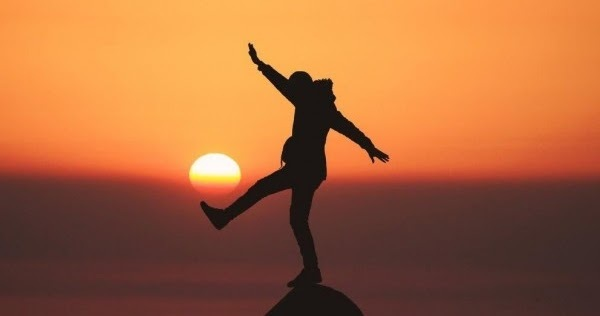

🖼️ Gambar Hasil Dekompresi:


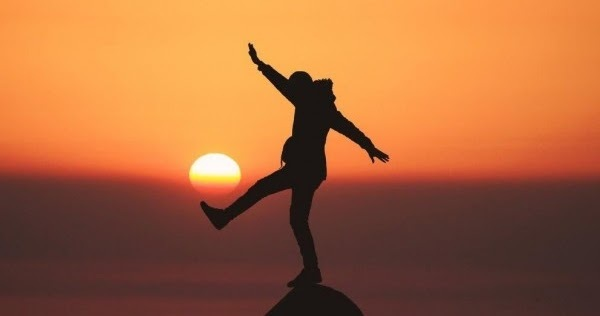

In [5]:
if image_files:
    original = os.path.join(folder_path, image_files[0])
    decompressed = os.path.join(folder_path, "decompressed_" + image_files[0])

    print("🖼️ Gambar Asli:")
    display(Image.open(original))

    print("🖼️ Gambar Hasil Dekompresi:")
    display(Image.open(decompressed))